#1. Tokenization

In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.chunk import RegexpParser
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

##• Write a Python program to perform word tokenization using NLTK

In [4]:
nltk.download('punkt_tab')

text = "Riphah University is located in Islamabad."

words = word_tokenize(text)
words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Riphah', 'University', 'is', 'located', 'in', 'Islamabad', '.']

##• Write a Python program to perform sentence tokenization using NLTK

In [5]:
sentences = sent_tokenize(text)
sentences


['Riphah University is located in Islamabad.']

#2. Stopword Removal


##• Write a Python program to eliminate stopwords using NLTK.

In [6]:
stop_words = set(stopwords.words('english'))

filtered_words = [w for w in words if w.lower() not in stop_words]
filtered_words


['Riphah', 'University', 'located', 'Islamabad', '.']

#3. Stemming

##• Write a Python program to perform stemming (Porter or Snowball) using NLTK.

In [7]:
ps = PorterStemmer()
snow = SnowballStemmer("english")

stemmed_porter = [ps.stem(w) for w in words]
stemmed_snowball = [snow.stem(w) for w in words]

stemmed_porter, stemmed_snowball


(['riphah', 'univers', 'is', 'locat', 'in', 'islamabad', '.'],
 ['riphah', 'univers', 'is', 'locat', 'in', 'islamabad', '.'])

#4. Parts of Speech Tagging

##• Write a Python program to perform POS tagging using NLTK

In [9]:
nltk.download('averaged_perceptron_tagger_eng')
pos_result = pos_tag(words)
pos_result

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('Riphah', 'NNP'),
 ('University', 'NNP'),
 ('is', 'VBZ'),
 ('located', 'VBN'),
 ('in', 'IN'),
 ('Islamabad', 'NNP'),
 ('.', '.')]

#5. Lemmatization


##• Write a Python program to perform lemmatization using WordNetLemmatizer.

In [10]:
lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(w) for w in words]
lemmatized_words


['Riphah', 'University', 'is', 'located', 'in', 'Islamabad', '.']

#6. Chunking


##• Write a Python program for chunking using NLTK’s RegEx chunk grammar

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.8 MB/s eta 0:00:00


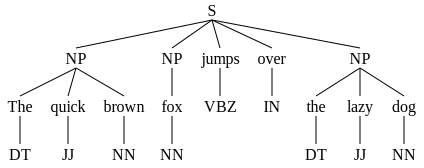

In [12]:
!pip install svgling
sentence = "The quick brown fox jumps over the lazy dog"
tokens = word_tokenize(sentence)
tagged = pos_tag(tokens)

grammar = "NP: {<DT>?<JJ>*<NN>}"
parser = RegexpParser(grammar)

chunked_output = parser.parse(tagged)
chunked_output

#7. Named Entity Recognition


##• Write a Python program for NER using NLTK’s ne_chunk().

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


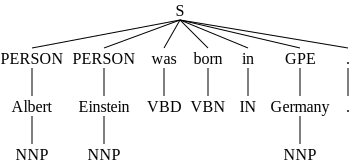

In [14]:
text2 = "Albert Einstein was born in Germany."

tokens = word_tokenize(text2)
tagged = pos_tag(tokens)

nltk.download('maxent_ne_chunker_tab')
ner_output = ne_chunk(tagged)
ner_output

#8. TF–IDF Calculation
##• Write a Python program to compute:
##o Term Frequency (TF)
##o Inverse Document Frequency (IDF)
##o TF–IDF values

In [16]:
docs = [
    "AI is the future of technology.",
    "Machine learning is part of AI.",
    "Deep learning advances AI research."
]



##🔹 Step 1 — Compute Term Frequency (TF)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
tf_matrix = cv.fit_transform(docs)

print("TF Matrix:")
print(tf_matrix.toarray())
print("\nVocabulary:")
print(cv.get_feature_names_out())


TF Matrix:
[[0 1 0 1 1 0 0 1 0 0 1 1]
 [0 1 0 0 1 1 1 1 1 0 0 0]
 [1 1 1 0 0 1 0 0 0 1 0 0]]

Vocabulary:
['advances' 'ai' 'deep' 'future' 'is' 'learning' 'machine' 'of' 'part'
 'research' 'technology' 'the']


##🔹 Step 2 — Compute Inverse Document Frequency (IDF)

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(tf_matrix)

print("\nIDF Values:")
for word, idf_val in zip(cv.get_feature_names_out(), tfidf_transformer.idf_):
    print(word, ":", idf_val)



IDF Values:
advances : 1.6931471805599454
ai : 1.0
deep : 1.6931471805599454
future : 1.6931471805599454
is : 1.2876820724517808
learning : 1.2876820724517808
machine : 1.6931471805599454
of : 1.2876820724517808
part : 1.6931471805599454
research : 1.6931471805599454
technology : 1.6931471805599454
the : 1.6931471805599454


##🔹 Step 3 — Compute TF-IDF Values

In [19]:
tfidf_matrix = tfidf_transformer.transform(tf_matrix)

print("\nTF-IDF Matrix:")
print(tfidf_matrix.toarray())



TF-IDF Matrix:
[[0.         0.27824521 0.         0.4711101  0.35829137 0.
  0.         0.35829137 0.         0.         0.4711101  0.4711101 ]
 [0.         0.2922544  0.         0.         0.37633075 0.37633075
  0.49482971 0.37633075 0.49482971 0.         0.         0.        ]
 [0.50461134 0.29803159 0.50461134 0.         0.         0.38376993
  0.         0.         0.         0.50461134 0.         0.        ]]


#Bonus 1: Sentiment Analysis
##• Write Python code to perform sentiment analysis using NLP (VADER or TextBlob)

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sentence = "I absolutely love Artificial Intelligence!"
sia.polarity_scores(sentence)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 0.197, 'pos': 0.803, 'compound': 0.8461}

#Bonus 2: Spam Filter
##• Write Python code to develop a Spam Detection model using NLP.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

data = [
    ("Win a free iPhone now!", "spam"),
    ("Your appointment is confirmed.", "ham"),
    ("Congratulations! You won a lottery!", "spam"),
    ("Please submit the assignment today.", "ham")
]

texts = [x[0] for x in data]
labels = [x[1] for x in data]

cv = CountVectorizer()
X = cv.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)

model = MultinomialNB()
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(y_test, pred)


1.0

#Bonus 3: Fake News Detection
##• Write Python code to build a Fake News Classification model using NLP and ML.

In [22]:
from sklearn.linear_model import LogisticRegression

docs = [
    "Breaking: Aliens landed in New York!",  # fake
    "PM announces new economic reforms.",    # real
    "Scientists discover cure for aging!",   # fake
    "Weather report predicts rain tomorrow." # real
]

labels = ["fake", "real", "fake", "real"]

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(docs)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

preds = classifier.predict(X_test)
accuracy_score(y_test, preds)


0.0